In [1]:
!ls ~/john/Areas_JKH/

Japan_1.0.csv	      USA2_florida.csv	USA_all.csv
USA1_gulf_mexico.csv  USA3_North.csv


In [1]:
from shapely.geometry import Polygon

import geopandas as gpd
import huracanpy
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
japan = pd.read_csv("~/john/Areas_JKH/Japan_1.0.csv", delimiter=" ", header=None, names=["lon", "lat"])
usa = pd.read_csv("~/john/Areas_JKH/USA_all.csv", delimiter=" ", header=None, names=["lon", "lat"])

usa_gulf_mexico = pd.read_csv("~/john/Areas_JKH/USA1_gulf_mexico.csv", delimiter=" ", header=None, names=["lon", "lat"])
usa_florida = pd.read_csv("~/john/Areas_JKH/USA2_florida.csv", delimiter=" ", header=None, names=["lon", "lat"])
usa_north = pd.read_csv("~/john/Areas_JKH/USA3_North.csv", delimiter=" ", header=None, names=["lon", "lat"])


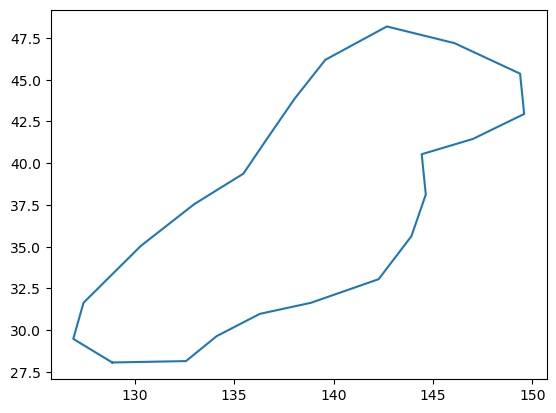

In [11]:
plt.plot(japan.lon, japan.lat)

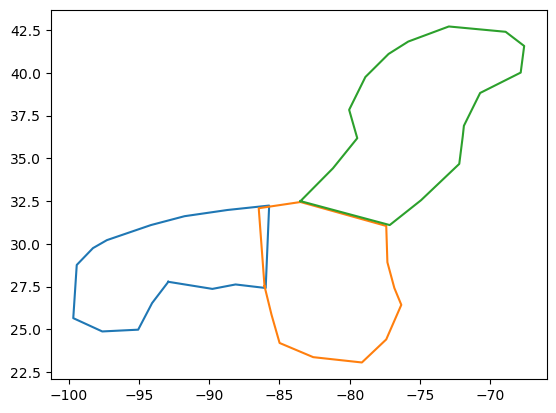

In [4]:
plt.plot(usa_gulf_mexico.lon, usa_gulf_mexico.lat)
plt.plot(usa_florida.lon, usa_florida.lat)
plt.plot(usa_north.lon, usa_north.lat)

In [13]:
Polygon([(lon, lat) for lon, lat in zip(japan.lon, japan.lat)]),

(<POLYGON ((128.866 28.067, 132.577 28.15, 134.124 29.647, 136.289 30.977, 13...>,)

In [19]:
B = dict(
    Japan=Polygon([(lon, lat) for lon, lat in zip(japan.lon, japan.lat)]),
    USA=Polygon([(lon, lat) for lon, lat in zip(usa.lon, usa.lat)]),
)
huracanpy.basins["CGFI"] = gpd.GeoDataFrame(index=B.keys(), geometry=list(B.values()))

from huracanpy.info import _geography
from importlib import reload

reload(_geography)

<module 'huracanpy.info._geography' from '/home/users/train187/miniforge3/envs/core/lib/python3.13/site-packages/huracanpy/info/_geography.py'>

(<Figure size 1000x1000 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

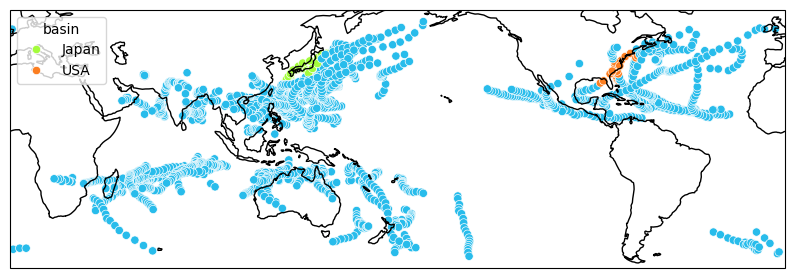

In [20]:
tracks = huracanpy.load(huracanpy.example_year_file)

tracks = tracks.hrcn.add_basin(convention="CGFI")

tracks.hrcn.plot_tracks(intensity_var_name="basin")